In [1]:
import numpy as np
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [2]:
PG = wb.DataReader('ITSA4.SA', data_source='yahoo', start='2000-1-1')

In [3]:
PG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-01-03,1.14360,1.01290,1.01835,1.08370,10285107.0,0.648692
2000-01-04,1.04558,0.98023,1.04558,0.98023,12071740.0,0.586756
2000-01-05,1.06192,0.94756,0.98568,1.06192,9163033.0,0.635654
2000-01-06,1.08370,1.05102,1.05647,1.07825,23085841.0,0.645429
2000-01-07,1.10548,1.06192,1.08914,1.07281,11216095.0,0.642173


In [4]:
PG.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-08-26,12.06,11.67,12.03,11.83,26136700.0,11.83
2019-08-27,12.11,11.81,11.88,12.02,43108300.0,12.02
2019-08-28,12.20,11.84,11.90,12.20,13051600.0,12.20
2019-08-29,12.34,12.00,12.23,12.26,26062600.0,12.26
2019-08-30,12.39,12.17,12.37,12.29,22422400.0,12.29


\begin{equation*}
\frac{P_1-P_0}{P_0} = \frac{P_1}{P_0} - 1
\end{equation*}

In [5]:
PG['simple_return'] = (PG['Adj Close'] / PG['Adj Close'].shift(1)) - 1
print(PG['simple_return'])

Date
2000-01-03         NaN
2000-01-04   -0.095478
2000-01-05    0.083338
2000-01-06    0.015378
2000-01-07   -0.005045
2000-01-10    0.035533
2000-01-11   -0.004906
2000-01-12   -0.019702
2000-01-13   -0.020098
2000-01-14    0.005123
2000-01-17    0.035714
2000-01-18   -0.024632
2000-01-19   -0.010100
2000-01-20   -0.020405
2000-01-21   -0.020830
2000-01-24   -0.021284
2000-01-25    0.102424
2000-01-26   -0.097833
2000-01-27   -0.010928
2000-01-28   -0.027626
2000-01-31   -0.034097
2000-02-01    0.023537
2000-02-02    0.000000
2000-02-03   -0.005751
2000-02-04    0.011559
2000-02-07    0.062854
2000-02-08   -0.005371
2000-02-09   -0.027028
2000-02-10   -0.005560
2000-02-11   -0.027924
                ...   
2019-07-22    0.015326
2019-07-23    0.005283
2019-07-24   -0.001501
2019-07-25   -0.030075
2019-07-26    0.008527
2019-07-29   -0.001537
2019-07-30   -0.016166
2019-07-31   -0.024257
2019-08-01    0.006415
2019-08-02   -0.007171
2019-08-05   -0.016051
2019-08-06    0.032626
2019-0

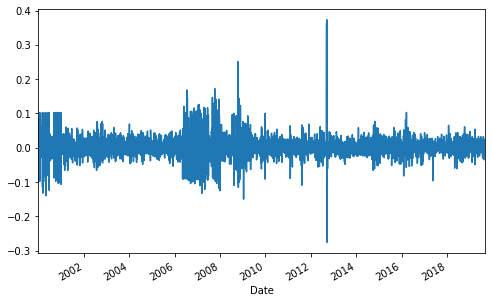

In [6]:
PG['simple_return'].plot(figsize=(8,5))
plt.show()

In [7]:
#taxa de retorno médio
avg_returns_d = PG['simple_return'].mean()
avg_returns_d

0.0010407790376685219

In [8]:
#o número de dias de negociação não são 365 dias por ano, portanto deve ser utilizado 250 em média
#taxa de retorno média diária, multiplicado por 250 dias
avg_returns_a = PG['simple_return'].mean()*250 #aproximação média diária por ano
avg_returns_a 

0.2601947594171305

In [9]:
print(str(round(avg_returns_a, 5) * 100) + ' %')

26.019 %


# Log Return

\begin{equation*}
\ln(\frac{P_t}{P_{t-1}})
\end{equation*}

In [10]:
PG.head()

,High,Low,Open,Close,Volume,Adj Close,simple_return
Date,,,,,,,
2000-01-03,1.14360,1.01290,1.01835,1.08370,10285107.0,0.648692,NaN
2000-01-04,1.04558,0.98023,1.04558,0.98023,12071740.0,0.586756,-0.095478
2000-01-05,1.06192,0.94756,0.98568,1.06192,9163033.0,0.635654,0.083338
2000-01-06,1.08370,1.05102,1.05647,1.07825,23085841.0,0.645429,0.015378
2000-01-07,1.10548,1.06192,1.08914,1.07281,11216095.0,0.642173,-0.005045


In [11]:
#NumPy oferece a possibilidade de computação vetorizada

#vetorização
#É a capacidade de organizar vários tipos de tarefas de processamento de dados como expressões de um array
#vetorização <-> programação usando matriz

In [12]:
log_teste = np.log(116/105)
log_teste

0.09962984094884134

In [13]:
PG['log_return'] = np.log(PG['Adj Close'] / PG['Adj Close'].shift(1)) #shift = dia anterior
print(PG['log_return'])

Date
2000-01-03         NaN
2000-01-04   -0.100349
2000-01-05    0.080047
2000-01-06    0.015261
2000-01-07   -0.005058
2000-01-10    0.034916
2000-01-11   -0.004918
2000-01-12   -0.019899
2000-01-13   -0.020302
2000-01-14    0.005110
2000-01-17    0.035091
2000-01-18   -0.024940
2000-01-19   -0.010151
2000-01-20   -0.020617
2000-01-21   -0.021050
2000-01-24   -0.021513
2000-01-25    0.097512
2000-01-26   -0.102955
2000-01-27   -0.010988
2000-01-28   -0.028014
2000-01-31   -0.034692
2000-02-01    0.023264
2000-02-02    0.000000
2000-02-03   -0.005768
2000-02-04    0.011493
2000-02-07    0.060958
2000-02-08   -0.005385
2000-02-09   -0.027400
2000-02-10   -0.005575
2000-02-11   -0.028322
                ...   
2019-07-22    0.015209
2019-07-23    0.005269
2019-07-24   -0.001503
2019-07-25   -0.030537
2019-07-26    0.008491
2019-07-29   -0.001538
2019-07-30   -0.016298
2019-07-31   -0.024556
2019-08-01    0.006395
2019-08-02   -0.007197
2019-08-05   -0.016182
2019-08-06    0.032105
2019-0

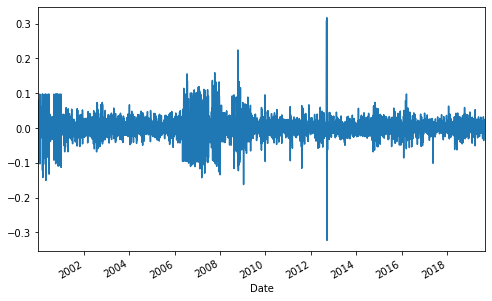

In [14]:
PG['log_return'].plot(figsize=(8,5))

In [15]:
log_return_d = PG['log_return'].mean()
log_return_d

0.0006047664244456585

In [16]:
log_return_a = PG['log_return'].mean() * 250
log_return_a

0.15119160611141463

In [17]:
print(str(round(log_return_a, 5) * 100) + '%')

15.119%
